In [ ]:
#Assignment-3
#Naga Venkata Pavan Kumar Somu
#NSOMU

In [ ]:
#1.Data Preprocessing

In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#dataset loaded
data = pd.read_csv("train.csv")

#  training data,Initial exploratory data analysis 
print("First few rows of the training dataset:")
print(data.head())  
print("\nInformation about the training dataset:")
print(data.info())  

# Handling the null values appropriately (using mean imputation)
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Work_Experience'] = imputer.fit_transform(data[['Work_Experience']])
data['Family_Size'] = imputer.fit_transform(data[['Family_Size']])

# Converting the categorical variables to numerical format
label_encoder = LabelEncoder()
for column in ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']:
    data[column] = label_encoder.fit_transform(data[column])

# Encoding the target variable 'Segmentation' in the classification task
data['Segmentation'] = label_encoder.fit_transform(data['Segmentation'])


print("\nModified training dataset:")
print(data.head())  


X_train = data.drop(columns=['Segmentation']) 
y_train = data['Segmentation']


First few rows of the training dataset:
       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  

Information about the training dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column  

In [ ]:
#2 Neural Network Implementation from Scratch: part 1

In [16]:
import numpy as np

class NN:
    def __init__(self, in_sz, hid_sz, out_sz, act='sigmoid', lr=0.01):
        self.in_sz = in_sz
        self.hid_sz = hid_sz
        self.out_sz = out_sz
        self.act = act
        self.lr = lr
        
        # Initialize weights and biases
        self.W_in_hid = np.random.randn(self.in_sz, self.hid_sz)
        self.b_in_hid = np.zeros((1, self.hid_sz))
        self.W_hid_out = np.random.randn(self.hid_sz, self.out_sz)
        self.b_hid_out = np.zeros((1, self.out_sz))
        
    def sig(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sig_der(self, x):
        return x * (1 - x)
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_der(self, x):
        return np.where(x > 0, 1, 0)
    
    def forward(self, inputs):
        # Input to hidden layer
        self.hid_out = np.dot(inputs, self.W_in_hid) + self.b_in_hid
        if self.act == 'sigmoid':
            self.hid_out_act = self.sig(self.hid_out)
        elif self.act == 'relu':
            self.hid_out_act = self.relu(self.hid_out)
        
        # Hidden to output layer
        self.out = np.dot(self.hid_out_act, self.W_hid_out) + self.b_hid_out
        if self.act == 'sigmoid':
            self.out_act = self.sig(self.out)
        elif self.act == 'relu':
            self.out_act = self.relu(self.out)
        
        return self.out_act
    
    def backward(self, inputs, targets):
        # Computing output layer err
        out_err = targets - self.out_act
        if self.act == 'sigmoid':
            out_delta = out_err * self.sig_der(self.out_act)
        elif self.act == 'relu':
            out_delta = out_err * self.relu_der(self.out_act)
        
        # Computing hidden layer err
        hid_err = out_delta.dot(self.W_hid_out.T)
        if self.act == 'sigmoid':
            hid_delta = hid_err * self.sig_der(self.hid_out_act)
        elif self.act == 'relu':
            hid_delta = hid_err * self.relu_der(self.hid_out_act)
        
       
        self.W_hid_out += self.hid_out_act.T.dot(out_delta) * self.lr
        self.b_hid_out += np.sum(out_delta, axis=0, keepdims=True) * self.lr
        self.W_in_hid += inputs.T.dot(hid_delta) * self.lr
        self.b_in_hid += np.sum(hid_delta, axis=0, keepdims=True) * self.lr
        
    def train(self, inputs, targets, epochs):
        for epoch in range(epochs):
            output = self.forward(inputs)
            self.backward(inputs, targets)
            if epoch % 100 == 0:
                loss = np.mean(np.square(targets - output))
                print(f"Epoch {epoch}: Loss {loss}")


In [ ]:
# 2. part 2

In [18]:
# Defining the input features (X) and target labels (y)
in_size = X_train.shape[1]
hid_size = 64
out_size = 1
lr = 0.01

# neural network
nn = NN(in_size, hid_size, out_size, 'sigmoid', lr)

# Training the model
for epoch in range(1000):
    output = nn.forward(X_train)
    nn.backward(X_train, y_train)
    if epoch % 100 == 0:
        loss = np.mean(np.square(y_train - output))
        print(f"Epoch {epoch}: Loss {loss}")


C:\Users\somu4\AppData\Local\Temp\ipykernel_23436\774626023.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 0: Loss 3.6610864700509005
Epoch 100: Loss 1.6130391670798214
Epoch 200: Loss 1.6130391670798214
Epoch 300: Loss 1.6130391670798214
Epoch 400: Loss 1.6130391670798214
Epoch 500: Loss 1.6130391670798214
Epoch 600: Loss 1.6130391670798214
Epoch 700: Loss 1.6130391670798214
Epoch 800: Loss 1.6130391670798214
Epoch 900: Loss 1.6130391670798214


In [ ]:
#2. part 3

In [19]:
#  neural network with ReLU activation function
nn_relu = NN(in_size, hid_size, out_size, 'relu', lr)

# Training the model with ReLU activation function
for ep in range(1000):
    out = nn_relu.forward(X)
    nn_relu.backward(X, y)
    if ep % 100 == 0:
        loss = np.mean(np.square(y - out))
        print(f"Epoch {ep}: Loss {loss}")


Epoch 0: Loss 428706292075.37366
Epoch 100: Loss 3.7369856222112046
Epoch 200: Loss 3.7369856222112046
Epoch 300: Loss 3.7369856222112046
Epoch 400: Loss 3.7369856222112046
Epoch 500: Loss 3.7369856222112046
Epoch 600: Loss 3.7369856222112046
Epoch 700: Loss 3.7369856222112046
Epoch 800: Loss 3.7369856222112046
Epoch 900: Loss 3.7369856222112046


In [ ]:
#3.Neural Network using Scikit-learn:

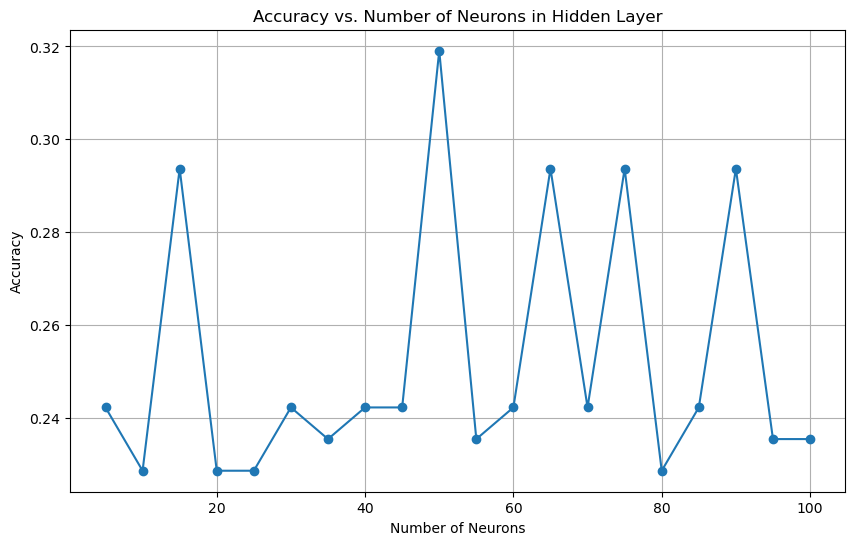

In [25]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


df = pd.read_csv("train.csv")
 
#  features and target variable is being seperated
X = df.drop(columns=['Segmentation'])
y = df['Segmentation']


le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])


imp = SimpleImputer(strategy='mean')
X = imp.fit_transform(X)

# Splitting dataset into training and testing sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# In hidden layers,Defining range of neuron counts
nc = range(5, 101, 5)


acc_scores = []


    mdl = MLPClassifier(hidden_layer_sizes=(n,), random_state=42)
    mdl.fit(X_tr, y_tr)
    acc = mdl.score(X_te, y_te)
    acc_scores.append(acc)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(nc, acc_scores, marker='o')
plt.title('Accuracy vs. Number of Neurons in Hidden Layer')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
#4th question

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("train.csv")

X = df.drop(columns=['Segmentation'])
y = df['Segmentation']


le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Handling the missing values
imp = SimpleImputer(strategy='mean')
X = imp.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training model
mdl = LogisticRegression(random_state=42)
mdl.fit(X_train, y_train)

# Predicting on test set
y_pred = mdl.predict(X_test)

# Calculating accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.2936802973977695


In [ ]:
#Evaluation and Comparison:

Accuracy of Logistic Regression Model: 0.2936802973977695
Accuracy of Neural Network Model: 0.23543990086741015


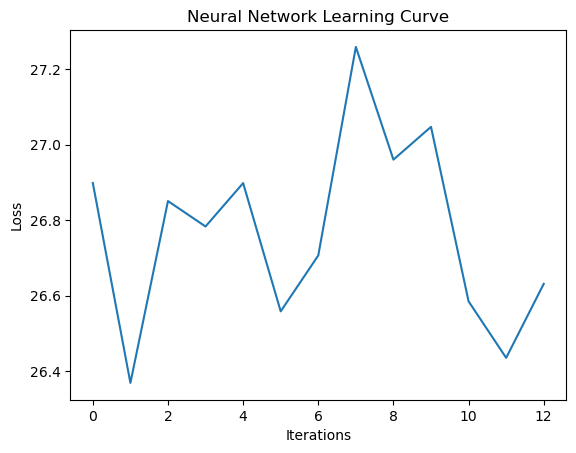

Confusion Matrix for Logistic Regression:
[[  0   0   0 391]
 [  0   0   0 369]
 [  0   0   0 380]
 [  0   0   0 474]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       391
           B       0.00      0.00      0.00       369
           C       0.00      0.00      0.00       380
           D       0.29      1.00      0.45       474

    accuracy                           0.29      1614
   macro avg       0.07      0.25      0.11      1614
weighted avg       0.09      0.29      0.13      1614

Confusion Matrix for Neural Network:
[[  0   0 391   0]
 [  0   0 369   0]
 [  0   0 380   0]
 [  0   0 474   0]]

Classification Report for Neural Network:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       391
           B       0.00      0.00      0.00       369
           C       0.24      1.00      0.38       380
           D       0.00 

C:\Users\somu4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somu4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somu4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somu4\anaconda3\lib\site-packages\sklearn\metr

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


d = pd.read_csv("train.csv")


X = d.drop(columns=['Segmentation'])
y = d['Segmentation']


l = LabelEncoder()
for c in X.select_dtypes(include=['object']).columns:
    X[c] = l.fit_transform(X[c])


i = SimpleImputer(strategy='mean')
X = i.fit_transform(X)

# Splitting data into training and testing sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train logistic regression model
log_m = LogisticRegression(random_state=42)
log_m.fit(X_tr, y_tr)

# Predicting using logistic regression model
p_log = log_m.predict(X_te)

# Calculating accuracy for logistic regression
a_log = accuracy_score(y_te, p_log)
print("Accuracy of Logistic Regression Model:", a_log)


nn_m = MLPClassifier(random_state=42)
nn_m.fit(X_tr, y_tr)


p_nn = nn_m.predict(X_te)

# Calculating accuracy for neural network
a_nn = accuracy_score(y_te, p_nn)
print("Accuracy of Neural Network Model:", a_nn)

# Plotting the loss curve for the neural network
plt.plot(nn_m.loss_curve_)
plt.title("Neural Network Learning Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# Confusion matrix and classification report
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_te, p_log))
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_te, p_log))


print("Confusion Matrix for Neural Network:")
print(confusion_matrix(y_te, p_nn))
print("\nClassification Report for Neural Network:")
print(classification_report(y_te, p_nn))
